# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [1]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [12]:
print(iris.keys())
print(iris['filename'])
print(iris.data[0:10])
print(type(iris.data))
print(iris.target)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [27]:
# we only take the first two features. 
X=iris.data[:,:2]
print(X.shape)
Y=iris.target
print(Y.shape)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [20]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [26]:
print('target_names: '+str(iris.target_names))

target_names: ['setosa' 'versicolor' 'virginica']


In [24]:
#建立Target欄位與資料
y=pd.DataFrame(iris.target,columns=['target'])
y.head(10)

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [44]:
#合併資料特徵欄位與目標欄位
iris_data=pd.concat([x,y],axis=1)
iris_data=iris_data[['sepal length (cm)','petal width (cm)','target']]
iris_data

,sepal length (cm),petal width (cm),target
0,5.1,0.2,0
1,4.9,0.2,0
2,4.7,0.2,0
3,4.6,0.2,0
4,5.0,0.2,0
...,...,...,...
145,6.7,2.3,2
146,6.3,1.9,2
147,6.5,2.0,2
148,6.2,2.3,2


In [49]:
#只選擇目標為0與1的資料
iris_data=iris_data[iris_data['target'].isin([0,1])]
iris_data
# print(iris['data'].size) #資料量

,sepal length (cm),petal width (cm),target
0,5.1,0.2,0
1,4.9,0.2,0
2,4.7,0.2,0
3,4.6,0.2,0
4,5.0,0.2,0
...,...,...,...
95,5.7,1.2,1
96,5.7,1.3,1
97,6.2,1.3,1
98,5.1,1.1,1


## 切分訓練集與測試集
> train_test_split()

In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(iris_data[['sepal length (cm)','petal width (cm)']],iris_data[['target']],\
                                                  test_size=0.3)

In [133]:
x_train.head()
#x_train.shape

,sepal length (cm),petal width (cm)
44,5.1,0.4
80,5.5,1.1
85,6.0,1.6
28,5.2,0.2
56,6.3,1.6


In [156]:
x_test.head()
#x_test.shape

,sepal length (cm),petal width (cm)
75,6.6,1.4
91,6.1,1.4
99,5.7,1.3
34,4.9,0.2
59,5.2,1.4


In [157]:
y_train.head()
#y_train.shape

,target
44,0
80,1
85,1
28,0
56,1


In [158]:
y_test.head()
#y_test.shape

,target
75,1
91,1
99,1
34,0
59,1


# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [159]:
def norm_stats(dfs):
    minimum = dfs.min()
    maximum = dfs.max()
    mu = dfs.mean()
    sigma = dfs.std()
    return (minimum, maximum, mu, sigma)


def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [170]:
stats = norm_stats(x_train)
arr_x_train = np.array(z_score(x_train, stats))
arr_y_train = np.array(y_train)

arr_x_train[:5]

array([[-0.53716183, -0.64116342],
       [ 0.10835453,  0.60061554],
       [ 0.91524999,  1.4876005 ],
       [-0.37578274, -0.99595741],
       [ 1.39938727,  1.4876005 ]])

## use sklearn

In [163]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x_test)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.56       0.84333333]
[0.681469   0.56431866]


In [164]:
#transform: (x-u)/std.
x_test_std = sc.transform(x_test)
x_test_std[:5]

array([[ 1.5261149 ,  0.98644029],
       [ 0.79240582,  0.98644029],
       [ 0.20543854,  0.80923545],
       [-0.968496  , -1.14001782],
       [-0.52827054,  0.98644029]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [169]:
x_train_std = sc.transform(x_train)
print(x_train_std[:5])

[[-0.67501236 -0.78560813]
 [-0.08804509  0.45482576]
 [ 0.645664    1.34084997]
 [-0.52827054 -1.14001782]
 [ 1.08588945  1.34084997]]


you can also use fit_transform method (i.e., fit and then transform)    

In [171]:
#一步到位：fit+transform
x_train_std = sc.fit_transform(x_train)  
x_test_std = sc.fit_transform(x_test)
print(x_train_std[:10])

[[-0.54104031 -0.64579282]
 [ 0.10913689  0.60495217]
 [ 0.92185838  1.49834144]
 [-0.37849601 -1.00314853]
 [ 1.40949128  1.49834144]
 [-1.02867321 -0.82447067]
 [-1.5163061  -0.82447067]
 [ 0.75931408  1.31966359]
 [-0.70358461 -0.28843711]
 [-1.6788504  -1.00314853]]


In [173]:
print('mean of x_test_std:',np.round(x_test_std.mean(),4))
print('std of x_test_std:',x_test_std.std())

mean of x_test_std: -0.0
std of x_test_std: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


49.6880175659658
29.744419414171663


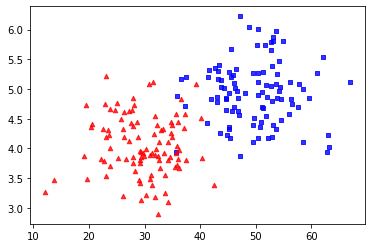

In [180]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [182]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [183]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [184]:
minmax_norm(x_val[:10])

array([0.45780229, 0.36127137, 0.89074206, 0.17616411, 0.        ,
       0.70533655, 0.70920788, 0.75015155, 0.55870333, 1.        ])

In [185]:
from sklearn.preprocessing import MinMaxScaler
print(x_val.shape)
x_val=x_val.reshape(-1, 1) # transform to 2-D
print(x_val.shape)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.transform(x_val)[:10])

(200,)
(200, 1)
[66.92613391]
[[0.66975396]
 [0.64093813]
 [0.79899254]
 [0.58568102]
 [0.53309356]
 [0.7436464 ]
 [0.74480205]
 [0.75702431]
 [0.69987433]
 [0.83160757]]
